In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [3]:
path = r'/Users/artoe/Documents/DataAnalytics/Machine Learning with Python/Achievement 1/data'

In [5]:
weather = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

In [9]:
pleasantweather = pd.read_csv(os.path.join(path, 'Pleasant_Weather.csv'), index_col = False)

In [11]:
#based on information from task 1.3, the missing columns from the pleasant weather data are Gdansk, Roma and Tours.

In [13]:
#creating subset with only relevant columns and weather stations in both data sets
df = weather[['DATE', 'MONTH', 'BASEL_precipitation','BASEL_sunshine','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',
                    'BELGRADE_precipitation','BELGRADE_sunshine','BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
                    'BUDAPEST_precipitation','BUDAPEST_sunshine','BUDAPEST_temp_mean','BUDAPEST_temp_min','BUDAPEST_temp_max',
                    'DEBILT_precipitation','DEBILT_sunshine','DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
                    'DUSSELDORF_precipitation','DUSSELDORF_sunshine','DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
                    'HEATHROW_precipitation','HEATHROW_sunshine','HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
                    'KASSEL_precipitation','KASSEL_sunshine','KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
                    'LJUBLJANA_precipitation','LJUBLJANA_sunshine','LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
                    'MAASTRICHT_precipitation','MAASTRICHT_sunshine','MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
                    'MADRID_precipitation','MADRID_sunshine','MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
                    'MUNCHENB_precipitation','MUNCHENB_sunshine','MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
                    'OSLO_precipitation','OSLO_sunshine','OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
                    'SONNBLICK_precipitation','SONNBLICK_sunshine','SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',
                    'STOCKHOLM_precipitation','STOCKHOLM_sunshine','STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
                    'VALENTIA_precipitation','VALENTIA_sunshine','VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']]

In [15]:
#create X and y data by dropping date and month columns
X = df.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [17]:
print(X.shape)
print(y.shape)

(22950, 75)
(22950, 15)


In [19]:
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 75)
(5738, 75)
(17212, 15)
(5738, 15)


[Text(0.36929409143270464, 0.9807692307692307, 'x[24] <= 17.95\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.06444773568257872, 0.9423076923076923, 'x[49] <= 17.95\ngini = 0.099\nsamples = 10778\nvalue = [[10106.0, 672.0]\n[9045.0, 1733.0]\n[9508.0, 1270.0]\n[10688.0, 90.0]\n[10778.0, 0.0]\n[10142.0, 636.0]\n[10697.0, 81.0]\n[9817.0, 961.0]\n[10710.0, 68.0]\n[8023.0, 2755.0]\n[10368.0, 410.0]\n[10511.0, 267.0]\n[10778.0, 0.0]\n[10529.0, 249.0]\n[10616.0, 162.0]]'),
 Text(0.21687091355764168, 0.9615384615384615, 'True  '),
 Text(0.018132835774577954, 0.9038461538461539, 'x[9] <= 17.95\ngini = 0.028\nsamples = 7558\nvalue = [[7435.0, 123.0]\n[6871.0, 687.0]\n[7205.0, 353.0]\n[7545.0, 13.0]\n[7558.0, 0.0]\n[7519.0, 39.0]\n[7537.0, 21.0]\n[7340.0, 218.0]\n[7536.0, 22.

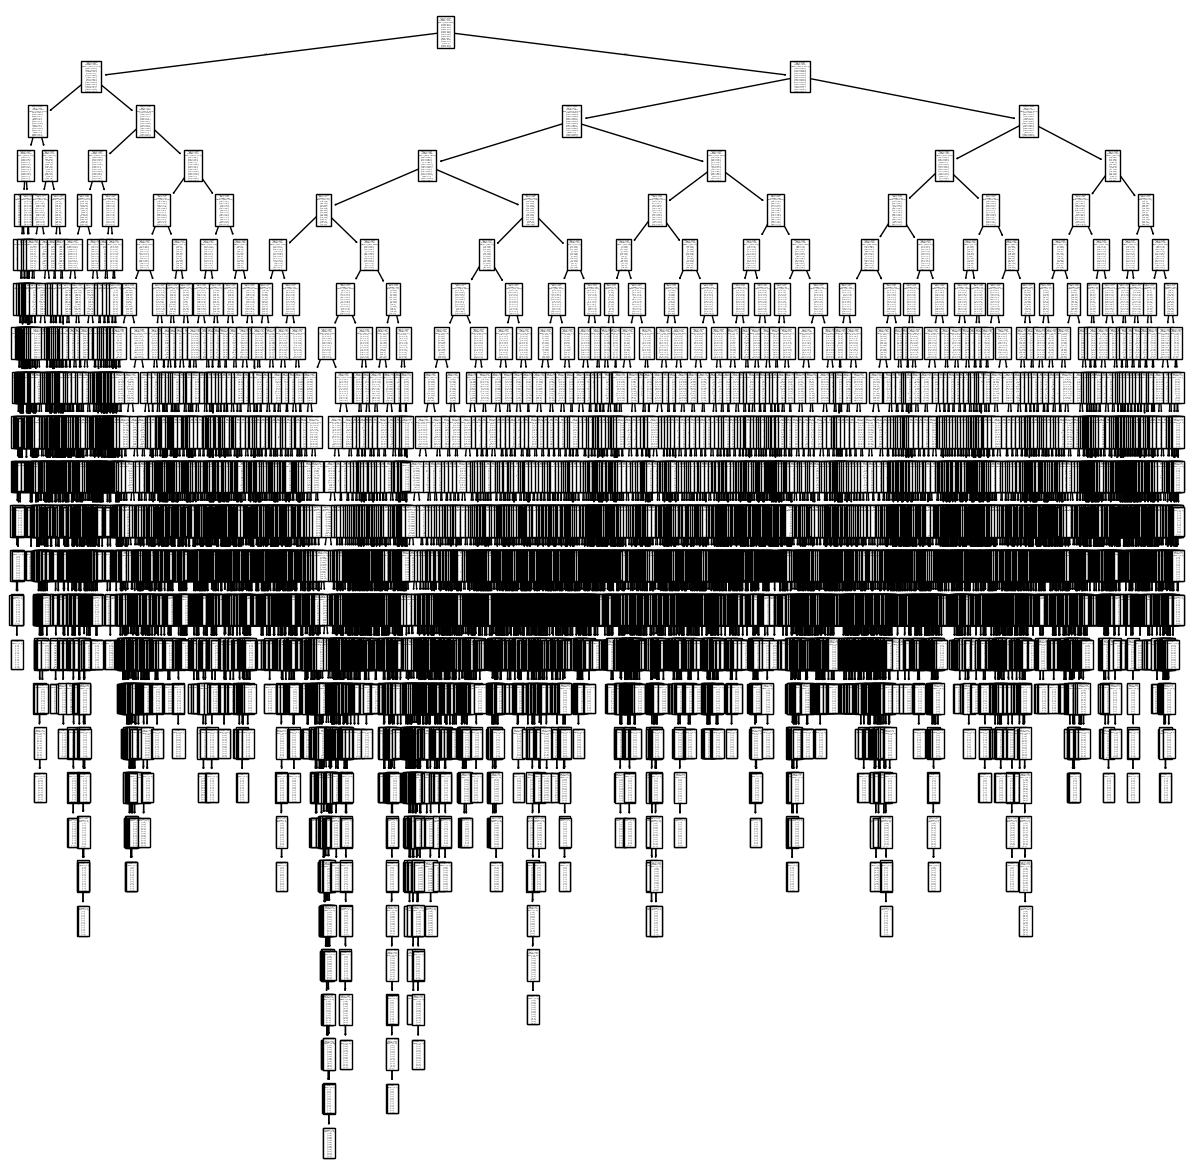

In [23]:
#Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(weather_dt)

In [25]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6096328049297871


C:\Users\artoe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


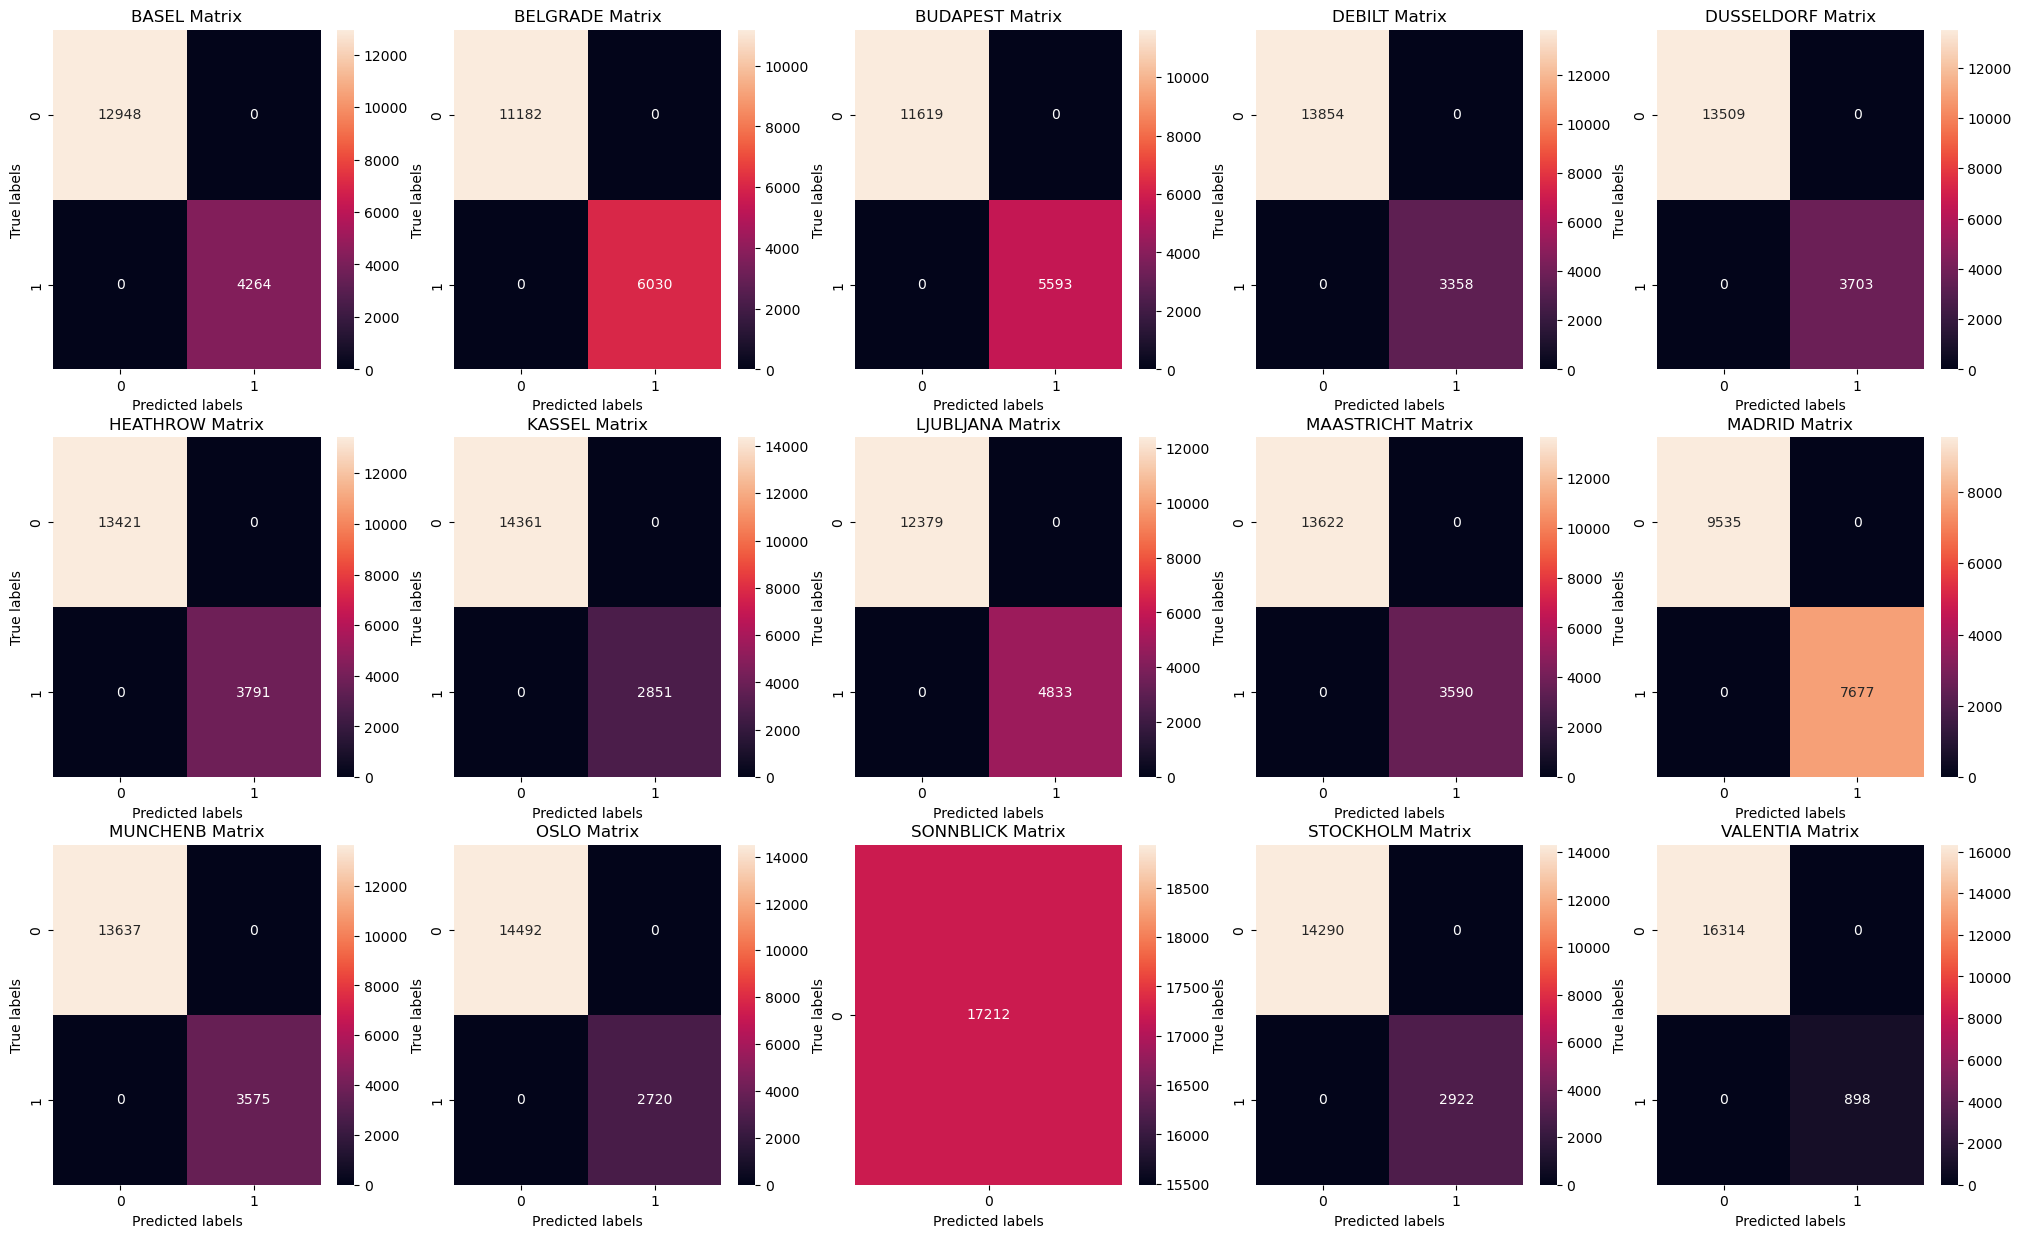

In [27]:
#training data confusion matrix
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

In [28]:
#What is the test accuracy score? Using the cross validation method
y_pred_test = weather_dt.predict(X_test)
print('Test accuracy score: ',cross_val_score(weather_dt, X_test, y_test, cv = 3, scoring='accuracy').mean())

Test accuracy score:  0.5599518744609481


C:\Users\artoe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


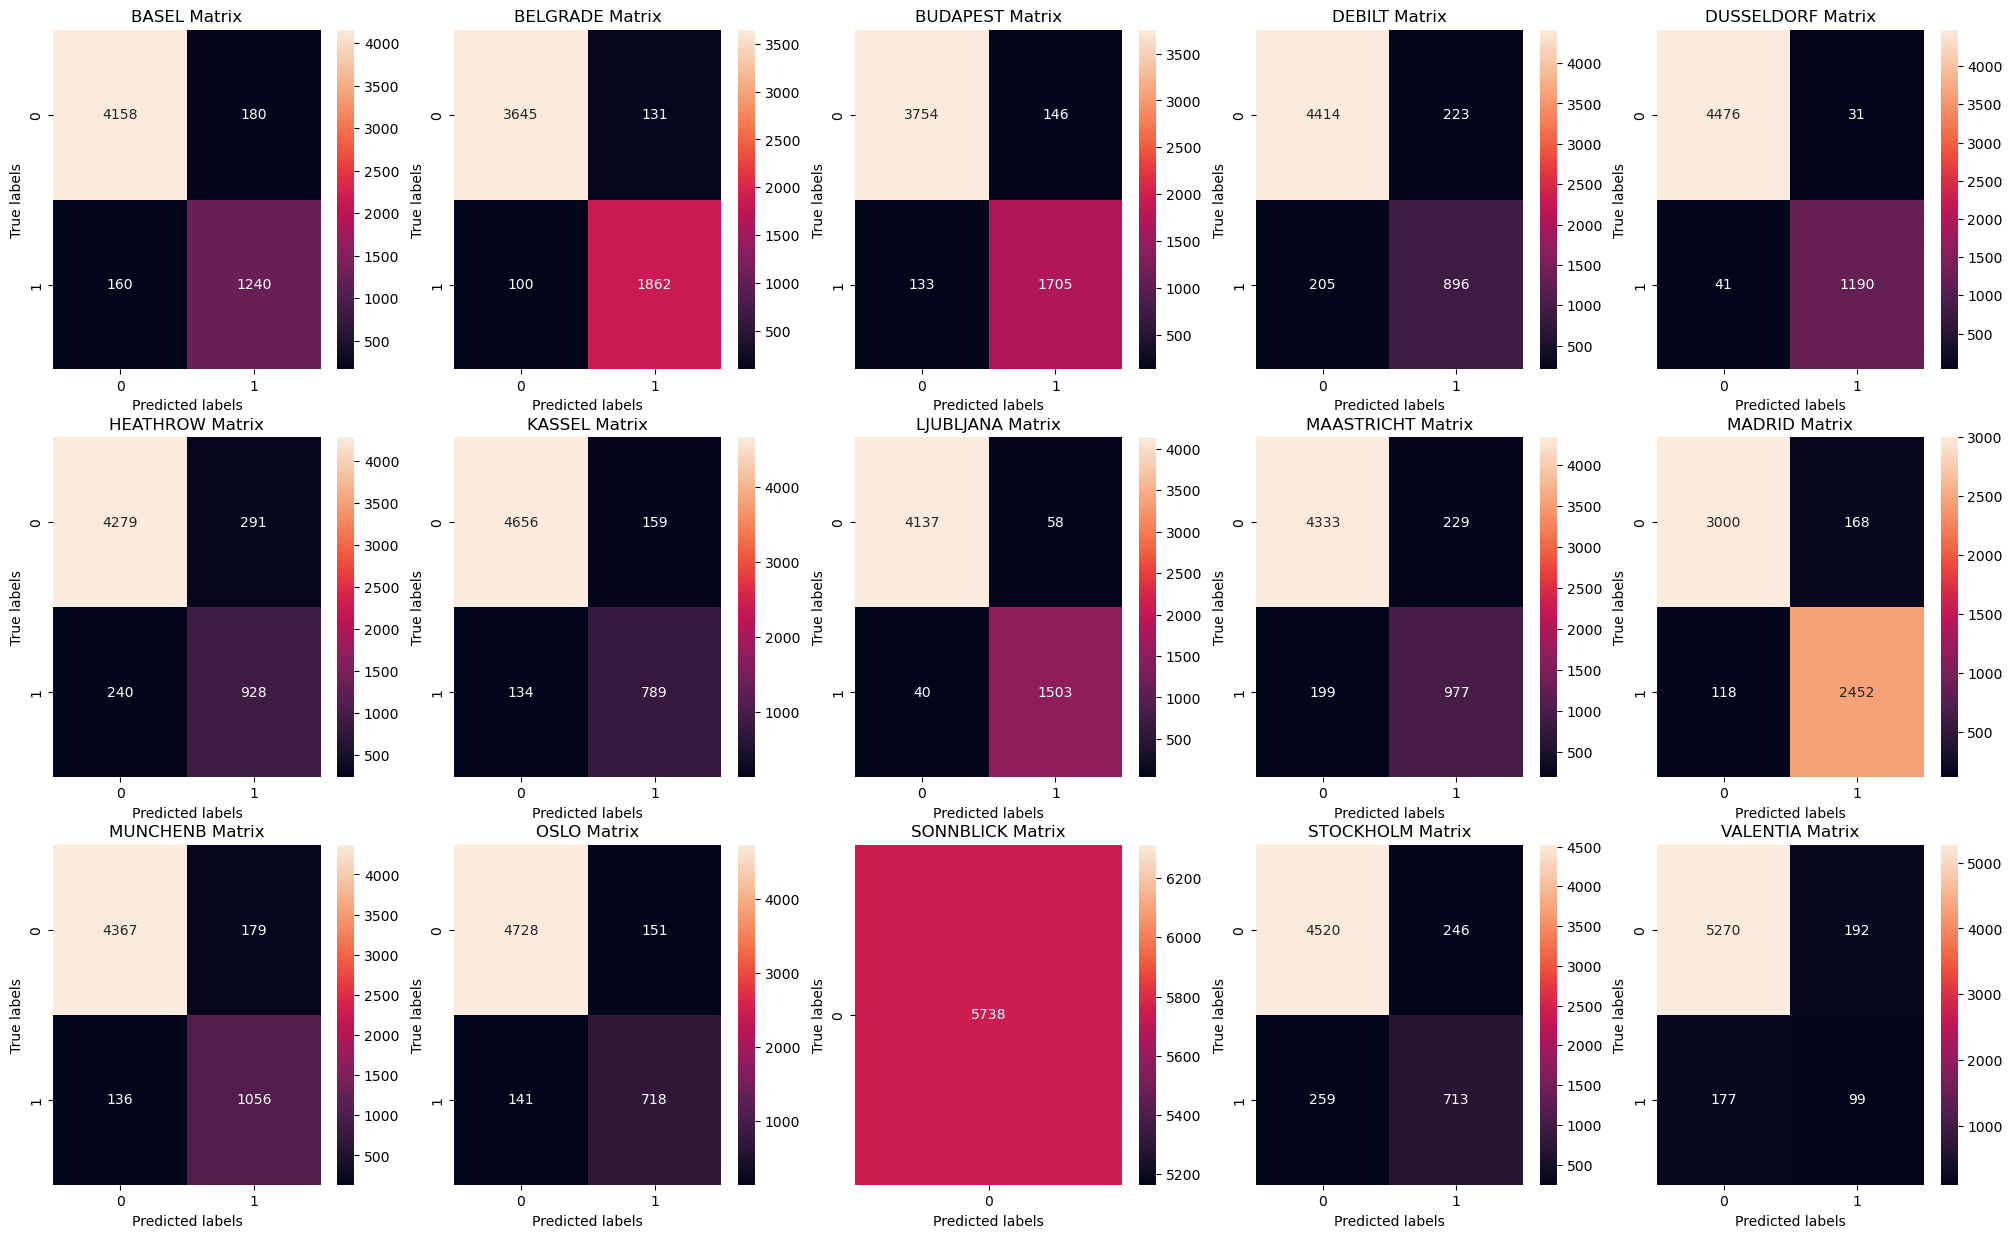

In [31]:
#test data confusion matrix
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1